# Forest Model 

This notebook runs a predefined setup of the forest model with its default parameter settings.\
The results are visualized in an interactive Jupyter visualization.\
Additionally, parameter space sweeps are performed with data generated in `SA_paramspace.ipynb`.

#### Contents:
1. Model Run
2. Parameter Space Sweeps

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq

import model as mdl
import visualisation as vis

import warnings
warnings.filterwarnings("ignore")

/home/reqctoe/CLS/10_ABM/agent-based-modelling/Project/visualisation.py:208: SyntaxWarning: invalid escape sequence '\%'
  'top_n_sites_percent': '$P_\%$'
/home/reqctoe/CLS/10_ABM/agent-based-modelling/Project/visualisation.py:299: SyntaxWarning: invalid escape sequence '\%'
  'top_n_sites_percent': '$P_\%$'


## 1. Model Run

In [2]:
"""
Visualisation of forest model simulation with preset parameter conditions.
Run this cell to see an instance of the model and its relevant metrics and system dynamics. 
"""

# Set model parameters
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 100,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 20,
    "height": 20,
    "harvest_params": [150,4,0.5],
    "fert_comp_ratio_exponent": -0.3,
    "top_n_sites_percent": 0.01
}

# Run and visualize model
page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume",
                                                                  "Infected Trees", "Mean Substrate", "Mean Soil Fertility"])

page

Cannot show ipywidgets in text

## 2. Parameter Space Sweeps

In [7]:
seed = 42
table_read = pq.read_table(f'sa_results_seed_{seed}.parquet')
data_read = table_read.to_pandas()
data_read

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,fert_comp_ratio_exponent,top_n_sites_percent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,55.859375,3,0.820312,0.671875,0.648438,100,50,13751.000000,0,1.0100,0.487769,0.000000,0
1,0,1,55.859375,3,0.820312,0.671875,0.648438,80,34,10569.759921,0,0.9500,0.177334,3312.968217,0
2,0,2,55.859375,3,0.820312,0.671875,0.648438,80,45,10649.989006,11,0.9275,0.143895,0.000000,0
3,0,3,55.859375,3,0.820312,0.671875,0.648438,80,27,10720.647941,11,0.9025,0.140196,0.000000,0
4,0,4,55.859375,3,0.820312,0.671875,0.648438,339,21,11048.021320,11,0.8975,0.125871,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15375355,19,996,133.984375,1,0.070312,-0.171875,0.539062,400,0,4361.993691,43,0.0425,0.077338,0.000000,15359
15375356,19,997,133.984375,1,0.070312,-0.171875,0.539062,397,58,4146.919490,42,0.0475,0.070764,290.611472,15359
15375357,19,998,133.984375,1,0.070312,-0.171875,0.539062,397,10,4222.785383,42,0.0225,0.091760,0.000000,15359
15375358,19,999,133.984375,1,0.070312,-0.171875,0.539062,397,10,4299.345993,42,0.0200,0.087184,0.000000,15359


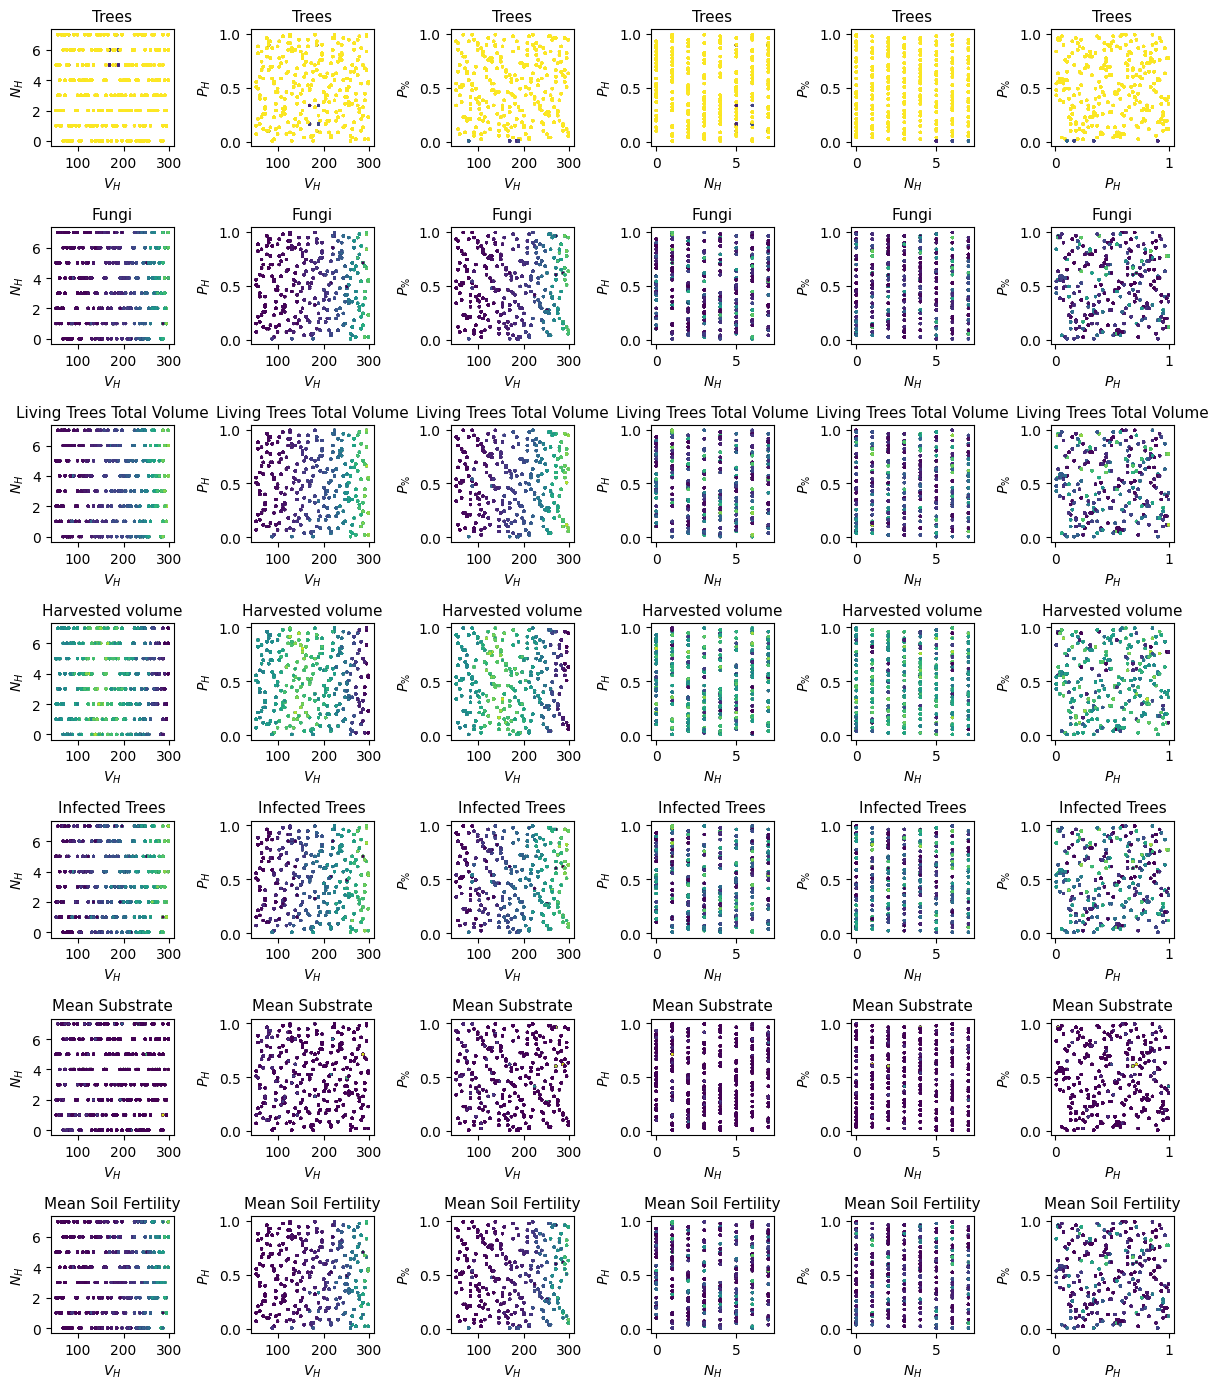

In [11]:
%matplotlib inline

vis.plot_param_space_array(data_read,
                           ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'top_n_sites_percent'],
                           outputs)